In [1]:
import datetime as dt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth' ,999)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

np.random.seed(3792)

In [3]:
kickoffs_df = pd.read_csv('../data/kickoffs_2018_w_players.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
kickoffs_model_df = pd.read_csv('../data/kickoffs_2018_model_ready.csv')

In [5]:
kickoffs_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'possessionTeam',
       'kickerId', 'returnerId', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'penaltyCodes', 'penaltyJerseyNumbers', 'penaltyYards',
       'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength',
       'kickReturnYardage', 'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'time', 'x', 'y', 's', 'a', 'dis',
       'o', 'dir', 'event', 'nflId', 'displayName', 'jerseyNumber', 'position',
       'team', 'frameId', 'playDirection', 'height', 'weight', 'birthDate',
       'collegeName', 'Position'],
      dtype='object')

In [60]:
kickoffs_df.dtypes

gameId                       int64
playId                       int64
playDescription             object
quarter                      int64
possessionTeam              object
kickerId                     int32
returnerId                  object
yardlineSide                object
yardlineNumber               int64
gameClock                   object
penaltyCodes                object
penaltyJerseyNumbers        object
penaltyYards                 int64
preSnapHomeScore             int64
preSnapVisitorScore          int64
kickLength                   int32
kickReturnYardage            int32
absoluteYardlineNumber       int64
hangTime                   float64
kickType                    object
kickDirectionIntended       object
kickDirectionActual         object
returnDirectionIntended     object
returnDirectionActual       object
missedTackler               object
assistTackler               object
tackler                     object
kickoffReturnFormation      object
specialTeamsSafeties

## Further Cleaning and Preprocessing
Still need to do more data cleaning and preprocessing of the data

In [55]:
#Seperating columns out by data type
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'int64'],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}

In [56]:
#Whoops reran this
colum_dict['Float']

['hangTime', 'x', 'y', 's', 'a', 'dis', 'o', 'dir']

In [38]:
#looks as though some of these actually should be Integers
kickoffs_df[colum_dict['Float']].head()

,kickerId,kickLength,kickReturnYardage,hangTime,x,y,s,a,dis,o,dir
0,37267.0,64.0,30.0,4.06,79.22,26.19,4.47,1.58,0.44,289.13,305.37
1,37267.0,64.0,30.0,4.06,78.84,26.46,4.74,1.63,0.46,294.79,304.46
2,37267.0,64.0,30.0,4.06,78.45,26.73,4.92,1.42,0.48,294.19,303.90
3,37267.0,64.0,30.0,4.06,78.03,27.01,5.07,1.21,0.50,295.89,303.00
4,37267.0,64.0,30.0,4.06,77.59,27.28,5.21,1.13,0.52,299.34,301.59


In [42]:
kickoffs_df[colum_dict['Float'][0:3]] = kickoffs_df[colum_dict['Float'][0:3]].astype(int)
kickoffs_df[colum_dict['Float'][0:3]].head()

,kickerId,kickLength,kickReturnYardage
0,37267,64,30
1,37267,64,30
2,37267,64,30
3,37267,64,30
4,37267,64,30


In [58]:
integers = ['int8', 'int16', 'int32', 'int64']

In [73]:
#Now we update our dictionary now that we've changed data types
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}
#colum_dict

In [69]:
#there are a couple columns that should be int not object.
kickoffs_df[colum_dict['Object']].head(1)

,playDescription,possessionTeam,returnerId,yardlineSide,gameClock,penaltyCodes,penaltyJerseyNumbers,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,specialTeamsSafeties,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,time,event,displayName,position,team,playDirection,height,birthDate,collegeName,Position
0,"M.Bosher kicks 64 yards from ATL 35 to PHI 1. S.Gibson to PHI 31 for 30 yards (D.Kazee, D.Riley).",ATL,44979,ATL,05:01:00,NP,NP,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,ATL 17; ATL 22,09/06/2018,20:20:00,PHI,ATL,2018-09-07T01:34:29.300,None,Matt Bosher,P,away,left,72,1987-10-18,Miami (Fla.),P


In [71]:
#We also can drop some unneeded columns like season & college, 
kickoffs_df.drop(columns=['season', 'collegeName'], inplace=True)

In [91]:
#Initially ran into a ValueError: invalid literal for int() with base 10: '36473;39975' e.g. there were two returners on the play
#Need to check if this is the only instance
#kickoffs_df.returnerId.map(lambda returnerId : int(returnerId) if type(returnerId) != int else returnerId)

In [87]:
#instance with two returners
kickoffs_df[kickoffs_df['returnerId'] == '36473;39975'].shape

(2436, 54)

In [88]:
#All other kickoffs in 2018
kickoffs_df[kickoffs_df['returnerId'] != '36473;39975'].shape

(2097702, 54)

In [92]:
#difference in shape is exactly the same as the shape of the two returner instance.
# as this was a single kickoff I see no issue in dropping it.
kickoffs_df.shape[0] - kickoffs_df[kickoffs_df['returnerId'] != '36473;39975'].shape[0]

2436

In [99]:
#what as the return yardage? appears to be 21 yards after the lateral to Patterson
#kickoffs_df[kickoffs_df['returnerId'] == '36473;39975'].head(1)

In [100]:
kickoffs_df.drop(kickoffs_df[kickoffs_df['returnerId'] == '36473;39975'].index, inplace=True)

In [103]:
#Appear to still have more with two returns, may be better to just move to One Hot Encoding to save time 
#kickoffs_df.returnerId.map(lambda returnerId : int(returnerId) if type(returnerId) != int else returnerId)

## Visualizations

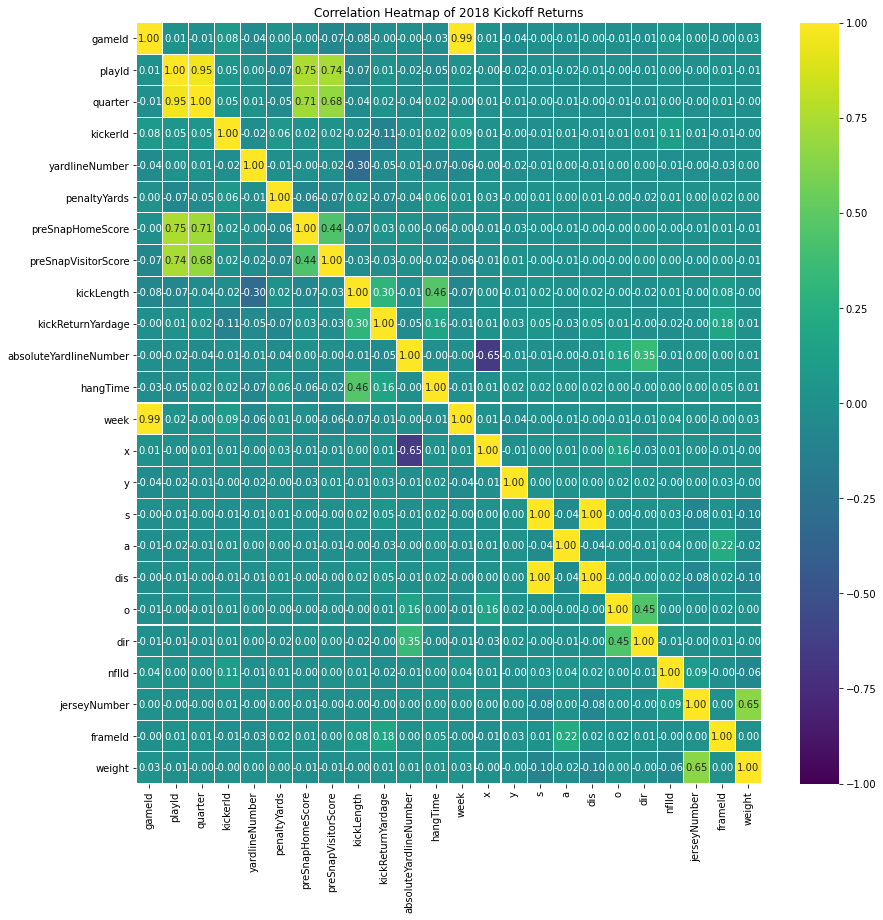

In [110]:
plt.figure(figsize=(14, 14))
sns.heatmap(kickoffs_df.corr(),
           annot= True,
           fmt='.2f',
           linewidths= .1,
           vmin= -1,
           vmax= 1,
           cmap= 'viridis')
plt.title('Correlation Heatmap of 2018 Kickoff Returns');

In [115]:
kickoffs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,2097702.0,2.018108e+09,11352.314963,2.018091e+09,2.018101e+09,2.018111e+09,2.018121e+09,2.018123e+09
playId,2097702.0,1.878248e+03,1255.486378,3.500000e+01,7.920000e+02,1.950000e+03,2.848000e+03,5.189000e+03
quarter,2097702.0,2.384974e+00,1.111526,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
kickerId,2097702.0,3.990901e+04,5608.231069,2.386000e+04,3.726700e+04,4.117500e+04,4.393700e+04,4.666300e+04
yardlineNumber,2097702.0,3.482248e+01,3.006031,2.000000e+01,3.500000e+01,3.500000e+01,3.500000e+01,5.000000e+01
penaltyYards,2097702.0,7.774403e-01,3.652602,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
preSnapHomeScore,2097702.0,1.288953e+01,10.808281,0.000000e+00,3.000000e+00,1.000000e+01,2.000000e+01,5.400000e+01
preSnapVisitorScore,2097702.0,1.074897e+01,9.793004,0.000000e+00,3.000000e+00,9.000000e+00,1.700000e+01,5.100000e+01
kickLength,2097702.0,6.263557e+01,5.904770,3.000000e+01,6.000000e+01,6.400000e+01,6.600000e+01,8.000000e+01
kickReturnYardage,2097702.0,2.460287e+01,12.592064,-3.000000e+00,1.800000e+01,2.300000e+01,2.800000e+01,1.020000e+02


In [118]:
kickoffs_df.groupby('kickReturnYardage').median().T

kickReturnYardage,-3,0,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,49,50,51,53,58,59,61,77,84,86,90,94,95,97,99,102
gameId,2.018111e+09,2.018113e+09,2.018122e+09,2.018111e+09,2.018103e+09,2.018111e+09,2.018102e+09,2.018111e+09,2.018112e+09,2.018112e+09,2.018113e+09,2.018102e+09,2.018102e+09,2.018111e+09,2.018110e+09,2.018110e+09,2.018111e+09,2.018111e+09,2.018112e+09,2.018111e+09,2.018112e+09,2.018110e+09,2.018103e+09,2.018110e+09,2.018111e+09,2.018110e+09,2.018111e+09,2.018103e+09,2.018111e+09,2.018121e+09,2.018102e+09,2.018112e+09,2.018120e+09,2.018113e+09,2.018110e+09,2.018110e+09,2.018123e+09,2.018112e+09,2.018122e+09,2.018102e+09,2.018112e+09,2.018092e+09,2.018113e+09,2.018093e+09,2.018112e+09,2.018091e+09,2.018122e+09,2.018121e+09,2.018102e+09,2.018111e+09,2.018120e+09,2.018122e+09,2.018122e+09,2.018120e+09,2.018121e+09,2.018092e+09,2.018091e+09,2.018102e+09,2.018122e+09,2.018122e+09,2.018091e+09
playId,1.957000e+03,2.235000e+03,4.201000e+03,2.758000e+03,2.350000e+03,2.145000e+03,2.242000e+03,1.849000e+03,2.306000e+03,2.312000e+03,2.311000e+03,2.087000e+03,2.223000e+03,2.153000e+03,2.060000e+03,1.495000e+03,1.960000e+03,1.694000e+03,2.044000e+03,1.843000e+03,1.434000e+03,1.322000e+03,1.412000e+03,2.118000e+03,2.321000e+03,1.420000e+03,1.606000e+03,1.648000e+03,1.735000e+03,2.106000e+03,2.701000e+03,1.675000e+03,2.280000e+03,1.690000e+03,1.851000e+03,1.762000e+03,3.602000e+03,6.140000e+02,1.852000e+03,2.291000e+03,3.194000e+03,2.467000e+03,1.953000e+03,2.497000e+03,3.730000e+02,4.236000e+03,6.540000e+02,2.093000e+03,2.847000e+03,3.600000e+01,2.044000e+03,4.389000e+03,4.089000e+03,2.229000e+03,1.617000e+03,2.325000e+03,3.300000e+03,1.452000e+03,4.420000e+02,1.461000e+03,2.956000e+03
quarter,2.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
kickerId,4.368900e+04,4.199100e+04,3.870100e+04,3.346900e+04,4.384600e+04,4.195300e+04,4.195300e+04,4.306800e+04,4.173600e+04,4.306800e+04,4.011400e+04,4.306800e+04,4.195300e+04,4.011300e+04,4.393700e+04,4.195300e+04,4.168800e+04,4.250800e+04,4.012500e+04,4.117500e+04,4.012500e+04,4.117500e+04,4.117500e+04,4.027600e+04,4.012500e+04,4.117500e+04,4.077500e+04,4.027600e+04,4.168800e+04,4.027600e+04,3.869100e+04,4.027600e+04,4.117500e+04,3.947000e+04,3.947000e+04,4.117500e+04,4.077500e+04,4.199100e+04,4.623600e+04,3.813400e+04,4.077500e+04,4.250800e+04,4.496600e+04,4.195300e+04,4.368900e+04,3.947000e+04,4.173600e+04,4.195300e+04,3.813400e+04,3.093200e+04,3.470700e+04,2.532600e+04,4.623600e+04,4.250800e+04,3.346900e+04,4.011300e+04,4.629800e+04,4.168800e+04,2.532600e+04,3.238600e+04,3.470700e+04
yardlineNumber,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,2.000000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.

In [8]:
#make_plot function created by Mary Schindler in our DST and Traffic Group project
def make_countplot(dataframe, 
                   x, y=None,
                   hue = None,
                  palete= None):
    
    return sns.countplot(data=dataframe,
                        x = x,
                        hue= hue,
                        palette= palete)

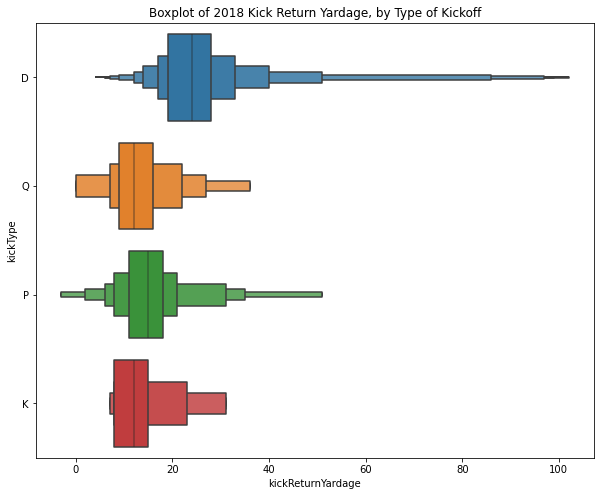

In [6]:
plt.figure(figsize=(10,8))

sns.boxenplot(data=kickoffs_df,
             x='kickReturnYardage',
             y = 'kickType')

plt.title('Boxplot of 2018 Kick Return Yardage, by Type of Kickoff')
plt.savefig('../images/Boxplot of 2018 Kick Return Yardage, by Type of Kickoff.png', bbox_inches = 'tight');

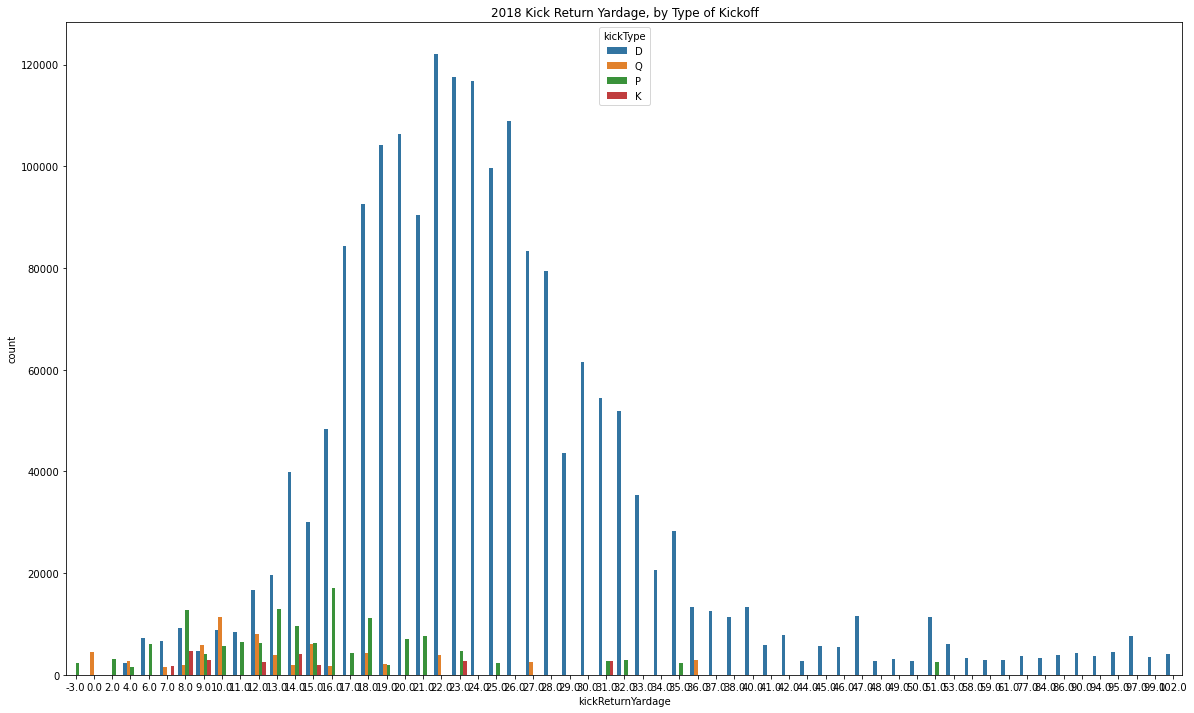

In [9]:
plt.figure(figsize=(20,12))
make_countplot(dataframe=kickoffs_df, x='kickReturnYardage', hue='kickType')
plt.title('2018 Kick Return Yardage, by Type of Kickoff');

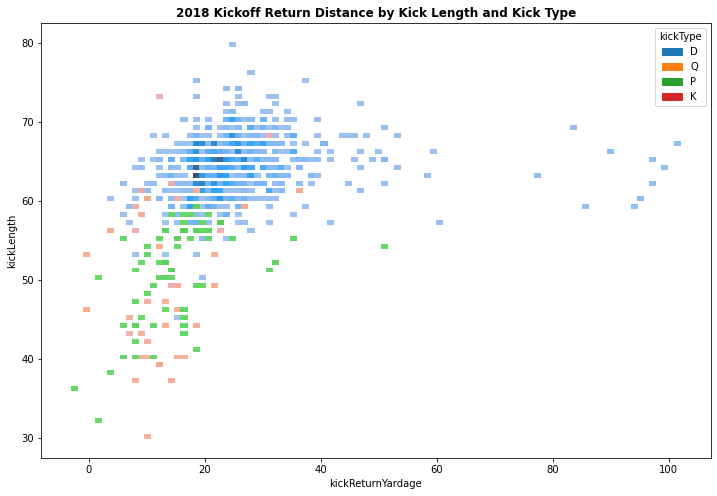

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=kickoffs_df, x='kickReturnYardage', y='kickLength', hue='kickType', bins=100, kde=True)
plt.title('2018 Kickoff Return Distance by Kick Length and Kick Type', fontweight='bold')
plt.savefig('../images/2018 Kickoff Return Distance by Kick Length and Kick Type.png', bbox_inches = 'tight');

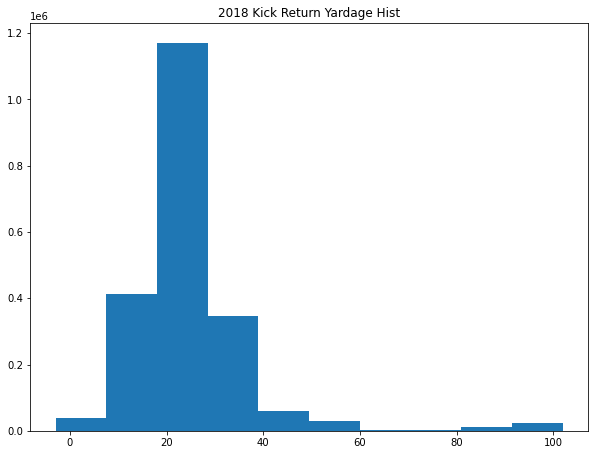

In [129]:
plt.figure(figsize=(10,7.5))
plt.hist(x=kickoffs_df['kickReturnYardage'])
plt.title('2018 Kick Return Yardage Hist');

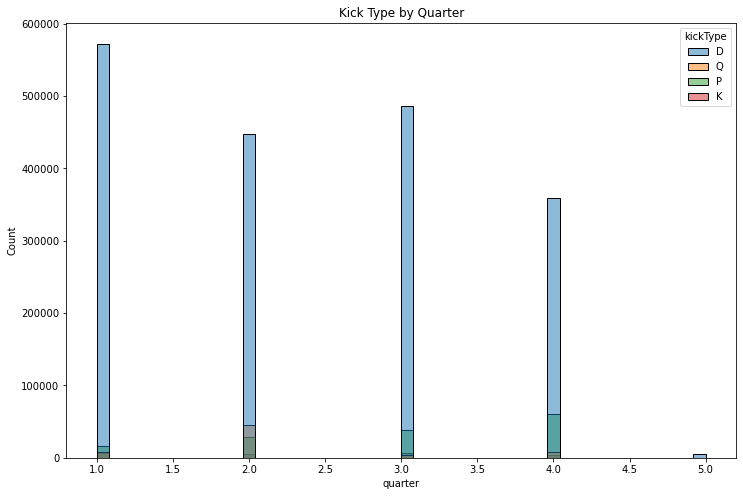

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data=kickoffs_df, x='quarter', hue= 'kickType', bins=50)
plt.title('Kick Type by Quarter')
plt.savefig('../images/kick_by_quarter.png', bbox_inches = 'tight');

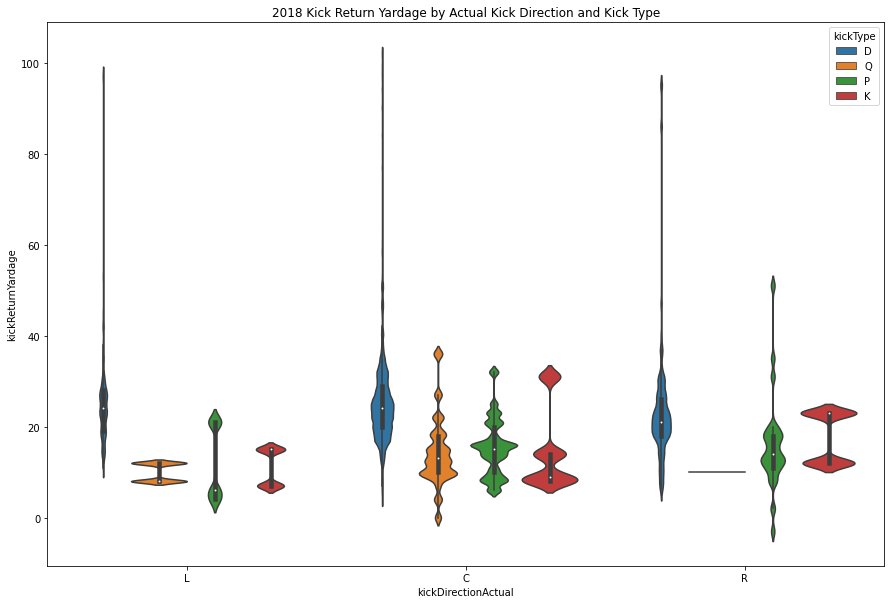

In [142]:
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionActual', order=['L', 'C', 'R'],
              hue='kickType',  orient= 'v')
plt.title('2018 Kick Return Yardage by Actual Kick Direction and Kick Type');

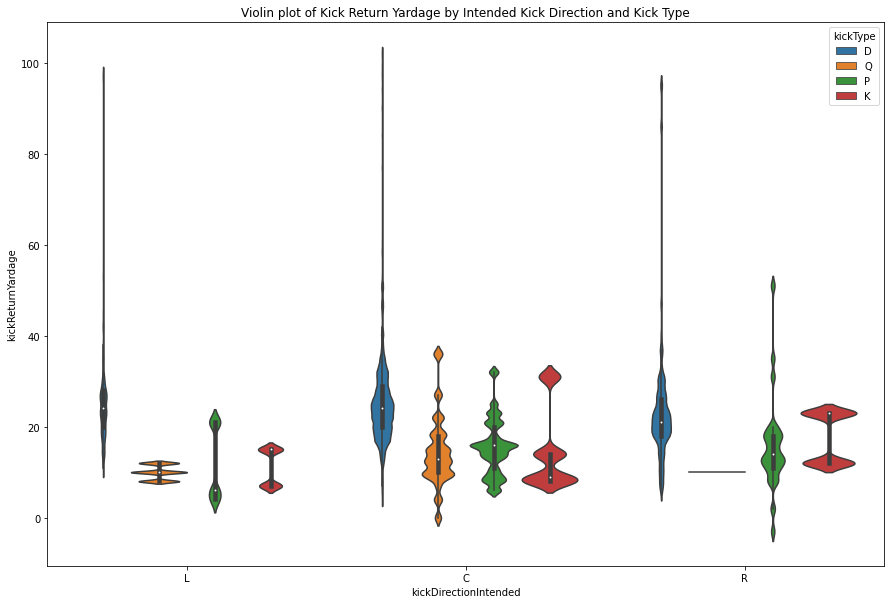

In [143]:
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionIntended', order=['L', 'C', 'R'],
              hue='kickType',  orient= 'v')
plt.title('Violin plot of Kick Return Yardage by Intended Kick Direction and Kick Type');

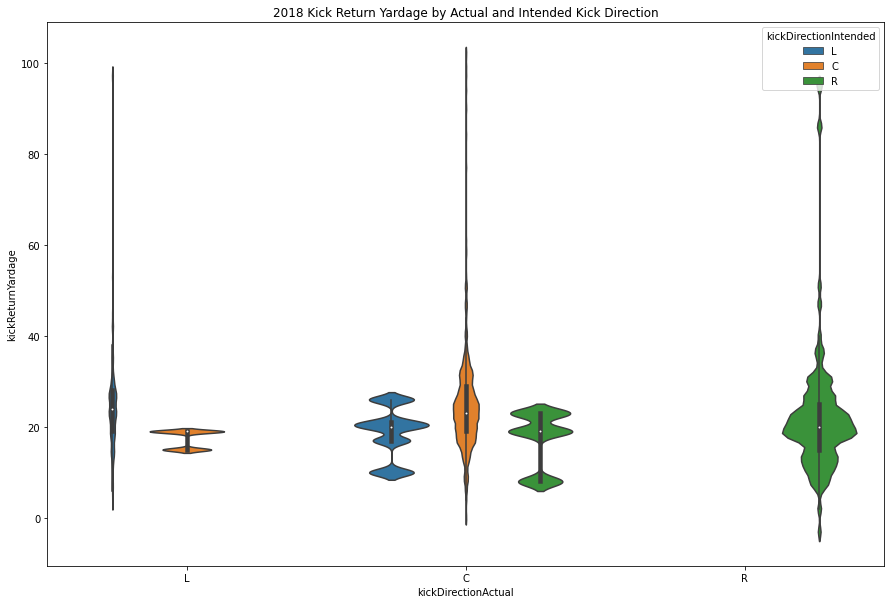

In [12]:
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionActual', order=['L', 'C', 'R'],
              hue='kickDirectionIntended', hue_order= ['L', 'C', 'R'],
              orient= 'v')
plt.title('2018 Kick Return Yardage by Actual and Intended Kick Direction')
plt.savefig('../images/violin_plot_kr_by_act_vs_int_kdir.png', bbox_inches = 'tight');

### Create Dummy Variables For categorical data
* First need to decide which columns to keep and dummy and which to drop

In [148]:
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}
#colum_dict

In [151]:
#Work through the categoricals in series of 10's
kickoffs_df[colum_dict['Object']].columns[0:10]

Index(['playDescription', 'possessionTeam', 'returnerId', 'yardlineSide',
       'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual'],
      dtype='object')

In [154]:
#Seem to be the same
#kickoffs_df[['possessionTeam', 'yardlineSide']]
#Ah yardlineside can also be midfield, but otherwise won't be different
kickoffs_df[(kickoffs_df['possessionTeam'] != kickoffs_df['yardlineSide']) & (kickoffs_df['yardlineSide'] != 'midfield')]

,gameId,playId,playDescription,quarter,possessionTeam,kickerId,returnerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,absoluteYardlineNumber,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,specialTeamsSafeties,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,playDirection,height,weight,birthDate,Position


In [155]:
#don't need home team abbr
kickoffs_df[colum_dict['Object']].columns[10:20]

Index(['returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr'],
      dtype='object')

In [156]:
#don't need visitor team Abbr, are time and gametime different?, don't really need both position columns or height/birthdate
kickoffs_df[colum_dict['Object']].columns[20:]

Index(['visitorTeamAbbr', 'time', 'event', 'displayName', 'position', 'team',
       'playDirection', 'height', 'birthDate', 'Position'],
      dtype='object')

In [158]:
#time could be useful
kickoffs_df['time'].head()

0    2018-09-07T01:34:29.300
1    2018-09-07T01:34:29.400
2    2018-09-07T01:34:29.500
3    2018-09-07T01:34:29.600
4    2018-09-07T01:34:29.700
Name: time, dtype: object

In [160]:
#position vs. Position; appear the same
kickoffs_df[['position', 'Position']].head()

,position,Position
0,P,P
1,P,P
2,P,P
3,P,P
4,P,P


In [162]:
#Do differ, but looks like "Position" is from college, so drop that one
kickoffs_df[kickoffs_df['Position'] != kickoffs_df['position']].head(1)

,gameId,playId,playDescription,quarter,possessionTeam,kickerId,returnerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,absoluteYardlineNumber,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,specialTeamsSafeties,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,playDirection,height,weight,birthDate,Position
14170,2018090600,677,"M.Bosher kicks 64 yards from ATL 35 to PHI 1. S.Gibson to PHI 31 for 30 yards (D.Kazee, D.Riley).",1,ATL,37267,44979,ATL,35,05:01:00,NP,NP,0,0,3,64,30,75,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,ATL 17; ATL 22,1,09/06/2018,20:20:00,PHI,ATL,2018-09-07T01:34:29.300,60.65,39.74,0.09,0.33,0.01,178.82,315.14,None,40408,LaRoy Reynolds,50,MLB,home,1,left,6-1,240,1990-11-03,OLB


In [164]:
kickoffs_df.shape

(2097702, 54)

In [165]:
# Based on above don't need: 'playDescription' , 'possessionTeam' , 'homeTeamAbbr', 'visitorTeamAbbr' , 'height', 'birthDate','Position'
kickoffs_df.drop(columns=['playDescription' , 'possessionTeam' , 'homeTeamAbbr', 'visitorTeamAbbr' , 'height', 'birthDate','Position'], inplace=True)

In [230]:
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}

In [168]:
kickoffs_df.columns

Index(['gameId', 'playId', 'quarter', 'kickerId', 'returnerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength',
       'kickReturnYardage', 'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'week', 'gameDate', 'gameTimeEastern', 'time',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'displayName',
       'jerseyNumber', 'position', 'team', 'frameId', 'playDirection',
       'weight'],
      dtype='object')

In [175]:
#would be great to do game Clock analysis but I don't think I have time to work out the time analysis right now
#kickoffs_df['gameClock'].value_counts()

In [180]:
kickoffs_df.drop(columns=['gameClock', 'time', 'displayName', 'penaltyCodes', 'penaltyJerseyNumbers'], inplace=True)

In [182]:
kickoffs_df[colum_dict['Object']].columns

Index(['returnerId', 'yardlineSide', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'missedTackler', 'assistTackler', 'tackler',
       'kickoffReturnFormation', 'specialTeamsSafeties', 'gameDate',
       'gameTimeEastern', 'event', 'position', 'team', 'playDirection'],
      dtype='object')

In [183]:
#lets get rid of the fumble events
kickoffs_df['event'].value_counts()

None                        2024353
kick_received                 19033
kickoff                       18903
tackle                        16347
first_contact                 14267
out_of_bounds                  2557
kickoff_land                    896
fumble                          319
free_kick                       172
penalty_flag                    152
kick_recovered                  150
touchdown                       128
fumble_defense_recovered        125
kickoff_play                     85
fumble_offense_recovered         84
lateral                          65
punt_received                    22
shift                            22
handoff                          22
Name: event, dtype: int64

In [206]:
kickoffs_df[kickoffs_df['event'].map(lambda x: True if 'fumble' in x else False)][['playId']].value_counts()

playId
36        86
3715      60
2202      44
794       42
2470      42
2871      42
4370      42
4030      40
419       22
2758      22
3619      22
4281      22
849       21
2701      21
dtype: int64

In [212]:
fumble_plays = [36, 3715, 2202, 794, 2470, 2871, 4370, 4030, 419, 2758, 3619, 4281, 849, 2701]
len(fumble_plays)

14

In [211]:
kickoffs_df['playId'].nunique()

728

In [214]:
#Would be about 2% of the overall plays, fine with that
round(14/728, 4)

0.0192

In [218]:
kickoffs_df[kickoffs_df['playId'].map(lambda x: True if x in fumble_plays else False)].shape[0]

236219

In [216]:
kickoffs_df.shape[0]

2097702

In [220]:
#Somehow 2% of the overall plays turns into 11.26% of the overall data....?
# That is a lot of the data, but we have over 2 million rows....
# I'm goign to do this, but come back after and look again at this
round(kickoffs_df[kickoffs_df['playId'].map(lambda x: True if x in fumble_plays else False)].shape[0] / kickoffs_df.shape[0], 4)

0.1126

In [221]:
mask = kickoffs_df[kickoffs_df['playId'].map(lambda x: True if x in fumble_plays else False)].index
mask

Int64Index([   2184,    2185,    2186,    2187,    2188,    2189,    2190,
               2191,    2192,    2193,
            ...
            2099048, 2099049, 2099050, 2099051, 2099052, 2099053, 2099054,
            2099055, 2099056, 2099057],
           dtype='int64', length=236219)

In [223]:
kickoffs_df.drop(mask, inplace=True)

In [251]:
kickoffs_df.drop(columns='weight', inplace=True)

In [229]:
kickoffs_df.columns

Index(['gameId', 'playId', 'quarter', 'kickerId', 'returnerId', 'yardlineSide',
       'yardlineNumber', 'penaltyYards', 'preSnapHomeScore',
       'preSnapVisitorScore', 'kickLength', 'kickReturnYardage',
       'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'week', 'gameDate', 'gameTimeEastern', 'x', 'y',
       's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'jerseyNumber',
       'position', 'team', 'frameId', 'playDirection'],
      dtype='object')

In [231]:
kickoffs_df['gameTimeEastern'].value_counts()

13:00:00    977236
20:20:00    262374
16:25:00    229440
16:05:00    206510
20:15:00    133580
09:30:00     20754
16:30:00     19708
22:20:00      7216
12:30:00      2376
19:10:00      2289
Name: gameTimeEastern, dtype: int64

In [244]:
gametime_mask = {}
count = 1
for i in [i for i in set(kickoffs_df['gameTimeEastern'])]:
        gametime_mask[i] = count
        count = count +1
        print(gametime_mask)

{'20:15:00': 1}
{'20:15:00': 1, '09:30:00': 2}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5, '16:25:00': 6}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5, '16:25:00': 6, '19:10:00': 7}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5, '16:25:00': 6, '19:10:00': 7, '16:30:00': 8}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5, '16:25:00': 6, '19:10:00': 7, '16:30:00': 8, '20:20:00': 9}
{'20:15:00': 1, '09:30:00': 2, '22:20:00': 3, '13:00:00': 4, '12:30:00': 5, '16:25:00': 6, '19:10:00': 7, '16:30:00': 8, '20:20:00': 9, '16:05:00': 10}


In [247]:
kickoffs_df['gameTimeEastern'] = kickoffs_df['gameTime   Eastern'].map(gametime_mask)
kickoffs_df[['gameTimeEastern']].head()

,gameTimeEastern
0,9
1,9
2,9
3,9
4,9


In [300]:
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}

In [249]:
kickoffs_df[colum_dict['Object']].columns

Index(['returnerId', 'yardlineSide', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'missedTackler', 'assistTackler', 'tackler',
       'kickoffReturnFormation', 'specialTeamsSafeties', 'gameDate', 'event',
       'position', 'team', 'playDirection'],
      dtype='object')

In [253]:
kickoffs_df.drop(columns='gameDate', inplace=True)

In [258]:
kickoffs_df.isna().sum().sum()

0

In [260]:
#pd.get_dummies(data=kickoffs_df.select_dtypes('object'), drop_first=True)
#size is 1861483 rows × 1267 columns 
#too big??? Probably to big to be easily iterpretable, definitely for ease of computing
#so need to downsize further

In [267]:
kickoffs_df.columns

Index(['gameId', 'playId', 'quarter', 'kickerId', 'returnerId', 'yardlineSide',
       'yardlineNumber', 'penaltyYards', 'preSnapHomeScore',
       'preSnapVisitorScore', 'kickLength', 'kickReturnYardage',
       'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'week', 'gameTimeEastern', 'x', 'y', 's', 'a',
       'dis', 'o', 'dir', 'event', 'nflId', 'jerseyNumber', 'position', 'team',
       'frameId', 'playDirection'],
      dtype='object')

In [266]:
#What if we collapse tackler into each other?
kickoffs_df[['missedTackler', 'assistTackler', 'tackler']].head()

,missedTackler,assistTackler,tackler
0,ATL 83,ATL 22,ATL 27
1,ATL 83,ATL 22,ATL 27
2,ATL 83,ATL 22,ATL 27
3,ATL 83,ATL 22,ATL 27
4,ATL 83,ATL 22,ATL 27


In [268]:
kickoffs_df['missedTackler'].value_counts()

returner_tackled    1329878
NT                   127008
CHI 15                 9851
GB 27                  7539
LA 24                  7380
                     ...   
LAC 29                 2058
CLE 37                 2024
SEA 49                 2000
NE 43                  1869
NE 18                  1701
Name: missedTackler, Length: 137, dtype: int64

In [272]:
#All instances of a missed tackle
mask= kickoffs_df[(kickoffs_df['missedTackler'] != 'returner_tackled') & (kickoffs_df['missedTackler'] != 'NT')].index

In [278]:
kickoffs_df['missedTackler'] = kickoffs_df['missedTackler'].map(lambda missedTackler: 'miss' if 
                                 missedTackler != 'NT' and missedTackler != 'returner_tackled' else missedTackler)

In [279]:
kickoffs_df['missedTackler'].value_counts()

returner_tackled    1329878
miss                 404597
NT                   127008
Name: missedTackler, dtype: int64

In [281]:
kickoffs_df['missedTackler'] = kickoffs_df['missedTackler'].map({
    'returner_tackled' : 0,
    'miss' : 1,
    'NT' : 2
})

In [283]:
kickoffs_df['assistTackler'] = kickoffs_df['assistTackler'].map(lambda assistTackler: 'assist' if 
                                 assistTackler != 'NT' and assistTackler != 'Solo' else assistTackler)

In [284]:
kickoffs_df['assistTackler'].value_counts()

Solo      1277069
assist     390730
NT         193684
Name: assistTackler, dtype: int64

In [334]:
kickoffs_df['assistTackler'] = kickoffs_df['assistTackler'].map({
    'NT' : 0,
    'Solo' : 1,
    'assist' : 2
})

In [288]:
kickoffs_df['tackler'] = kickoffs_df['tackler'].map(lambda tackler: 1 if tackler != 'NT' else 0)

In [299]:
kickoffs_df['returnerId'] = kickoffs_df.returnerId.map(lambda returnerId : int(returnerId) if type(returnerId) != int else returnerId)

In [313]:
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}

In [304]:
kickoffs_df.drop(columns='event', inplace=True)

In [306]:
kickoffs_df[colum_dict['Object']].columns

Index(['yardlineSide', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'kickoffReturnFormation',
       'specialTeamsSafeties', 'position', 'team', 'playDirection'],
      dtype='object')

In [307]:
kickoffs_df['kickoffReturnFormation'].value_counts()

8-0-2    1657080
8-0-1     154776
5-3-2      23448
6-2-2      11749
7-0-3       6377
6-0-4       3916
6-0-3       2079
8-1-1       2058
Name: kickoffReturnFormation, dtype: int64

In [310]:
#kickoffs_df['yardlineSide'].value_counts()

In [311]:
#Drop due to 252 length
#kickoffs_df['specialTeamsSafeties'].value_counts()

In [312]:
kickoffs_df.drop(columns='specialTeamsSafeties', inplace=True)

In [314]:
kickoffs_df[colum_dict['Object']].columns

Index(['yardlineSide', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'kickoffReturnFormation', 'position', 'team',
       'playDirection'],
      dtype='object')

In [317]:
kickoffs_df['playDirection'] = kickoffs_df['playDirection'].map({'left': 0, 'right': 1})

In [326]:
colum_dict = {'Int' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype in integers],
              'Float' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'float64'], 
              'Object' : [i for i in kickoffs_df.columns if kickoffs_df[i].dtype == 'object']}

In [327]:
kickoffs_df[colum_dict['Object']].columns

Index(['yardlineSide', 'kickType', 'kickDirectionIntended',
       'kickDirectionActual', 'returnDirectionIntended',
       'returnDirectionActual', 'kickoffReturnFormation', 'position'],
      dtype='object')

In [325]:
kickoffs_df['team'] = kickoffs_df['team'].map({'away': 0, 'home': 1})

In [330]:
kickoffs_df.shape

(1861483, 38)

In [331]:
kickoffs_df = pd.get_dummies(data=kickoffs_df, columns= list(kickoffs_df.select_dtypes('object').columns))
kickoffs_df.head(1)

,gameId,playId,quarter,kickerId,returnerId,yardlineNumber,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,absoluteYardlineNumber,hangTime,missedTackler,assistTackler,tackler,week,gameTimeEastern,x,y,s,a,dis,o,dir,nflId,jerseyNumber,team,frameId,playDirection,yardlineSide_ARI,yardlineSide_ATL,yardlineSide_BAL,yardlineSide_BUF,yardlineSide_CAR,yardlineSide_CHI,yardlineSide_CIN,yardlineSide_CLE,yardlineSide_DAL,yardlineSide_DEN,yardlineSide_DET,yardlineSide_GB,yardlineSide_HOU,yardlineSide_IND,yardlineSide_JAX,yardlineSide_KC,yardlineSide_LA,yardlineSide_LAC,yardlineSide_MIA,yardlineSide_MIN,yardlineSide_NE,yardlineSide_NO,yardlineSide_NYG,yardlineSide_NYJ,yardlineSide_OAK,yardlineSide_PHI,yardlineSide_PIT,yardlineSide_SEA,yardlineSide_SF,yardlineSide_TB,yardlineSide_TEN,yardlineSide_WAS,yardlineSide_midfield,kickType_D,kickType_K,kickType_P,kickType_Q,kickDirectionIntended_C,kickDirectionIntended_L,kickDirectionIntended_R,kickDirectionActual_C,kickDirectionActual_L,kickDirectionActual_R,returnDirectionIntended_C,returnDirectionIntended_L,returnDirectionIntended_R,returnDirectionActual_C,returnDirectionActual_L,returnDirectionActual_R,kickoffReturnFormation_5-3-2,kickoffReturnFormation_6-0-3,kickoffReturnFormation_6-0-4,kickoffReturnFormation_6-2-2,kickoffReturnFormation_7-0-3,kickoffReturnFormation_8-0-1,kickoffReturnFormation_8-0-2,kickoffReturnFormation_8-1-1,position_CB,position_DB,position_DE,position_DL,position_DT,position_FB,position_FS,position_G,position_HB,position_ILB,position_K,position_LB,position_LS,position_MLB,position_OLB,position_P,position_QB,position_RB,position_S,position_SS,position_TE,position_WR
0,2018090600,677,1,37267,44979,35,0,0,3,64,30,75,4.06,1,1,1,1,9,79.22,26.19,4.47,1.58,0.44,289.13,305.37,37267,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [332]:
#Ready to model, I hope....
kickoffs_df.to_csv('../data/kickoffs_2018_model_ready.csv', index=False)

In [333]:
kickoffs_df.columns

Index(['gameId', 'playId', 'quarter', 'kickerId', 'returnerId',
       'yardlineNumber', 'penaltyYards', 'preSnapHomeScore',
       'preSnapVisitorScore', 'kickLength',
       ...
       'position_LS', 'position_MLB', 'position_OLB', 'position_P',
       'position_QB', 'position_RB', 'position_S', 'position_SS',
       'position_TE', 'position_WR'],
      dtype='object', length=109)